# 5월 11일 오후수업

### Loistic Regression

사건발생을 예측하는 통계기법

오즈 비(odds ration)




## Logistic Regression


## Logistic function

$g(x) = {\dfrac {e^x}{1+e^x}}$

다른 말로 시그모이드(Sigmoid)함수라고 함. 그 모양이 S자와 유사한 성질이 있음.

독립변수의 선형결학을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계기법.

앞에서 선형회귀에서 우리는 1차 선형함수를 배웠다.

$y = Wx+b$

$y = W_1X_1+W_2X_2 +\cdots + W_nX_n +b$

오즈비

${\dfrac{p}{1-p}}$

$ln{\dfrac{p}{1-p}} = WX$

${\dfrac{p}{1-p}} = e^{WX}$

양변에 역수를 취하면,

${\dfrac{1-p}{p}} = {\dfrac{1}{p}}-1 = {\dfrac{1}{e^{WX}}}$

${\dfrac{1}{p}} = {\dfrac{1}{e^{WX}}} +1 = {\dfrac
{1}{e^{WX}}}+{\dfrac{e^{WX}}{e^{WX}}} = {\dfrac{1+e^{WX}}{e^{WX}}}$

다시 한번 역수를 취하면

$p = {\dfrac {e^{WX}}{1+e^{{WX}}}}$

우리가 아는 식으로 변형하면

$p = {\dfrac{e^{WX}}{1+e^{WX}}} \cdot {\dfrac{{\dfrac {1}{e^{WX}}}}{{\dfrac{1}{e^{WX}}}}} = {\dfrac{1}{\dfrac{1}{e^{WX}}+1}} = {\dfrac {1}{e^{-WX}}}$ 

--------------------------------------------------------------------------------------------------------------------

## 실습

위스콘신 유방암 예측

- 총 309개의 속성과 malignant(악성), benign(양성)의 타겟값을 가지고 있다

**데이터셋 조회**

빌트인 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용합니다.

key-value 형식으로 구성되어 있으며, 사전(dict)형 타입과 유사한 구조를 가지고 있습니다.

공통 key는 다음과 같습니다.

- data: 샘플 데이터, Numpy 배열로 이루어져 있습니다.
- target: Label 데이터, Numpy 배열로 이루어져 있습니다.
- feature_names: Feature 데이터의 이름
- target_names: Label 데이터의 이름
- DESCR: 데이터 셋의 설명
- filename: 데이터 셋의 파일 저장 위치 (csv)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
type(cancer)

sklearn.utils._bunch.Bunch

In [4]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
cancer.data.shape

(569, 30)

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
np.bincount(cancer.target) # 빈도 수 체크

array([212, 357])

In [9]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
for i, name in enumerate(cancer.feature_names):  # 이름에 따라 순번을 달아놓음.
  print('%02d : %s' %(i, name))

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


In [11]:
print('data =>', cancer.data.shape)
print('target =>', cancer.target.shape)

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

print('malignant(악성) => ', malignant.shape)
print('benign(악성) -> ', benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) =>  (212, 30)
benign(악성) ->  (357, 30)


In [12]:
len(cancer.feature_names)

30

In [13]:
len(cancer.data)

569

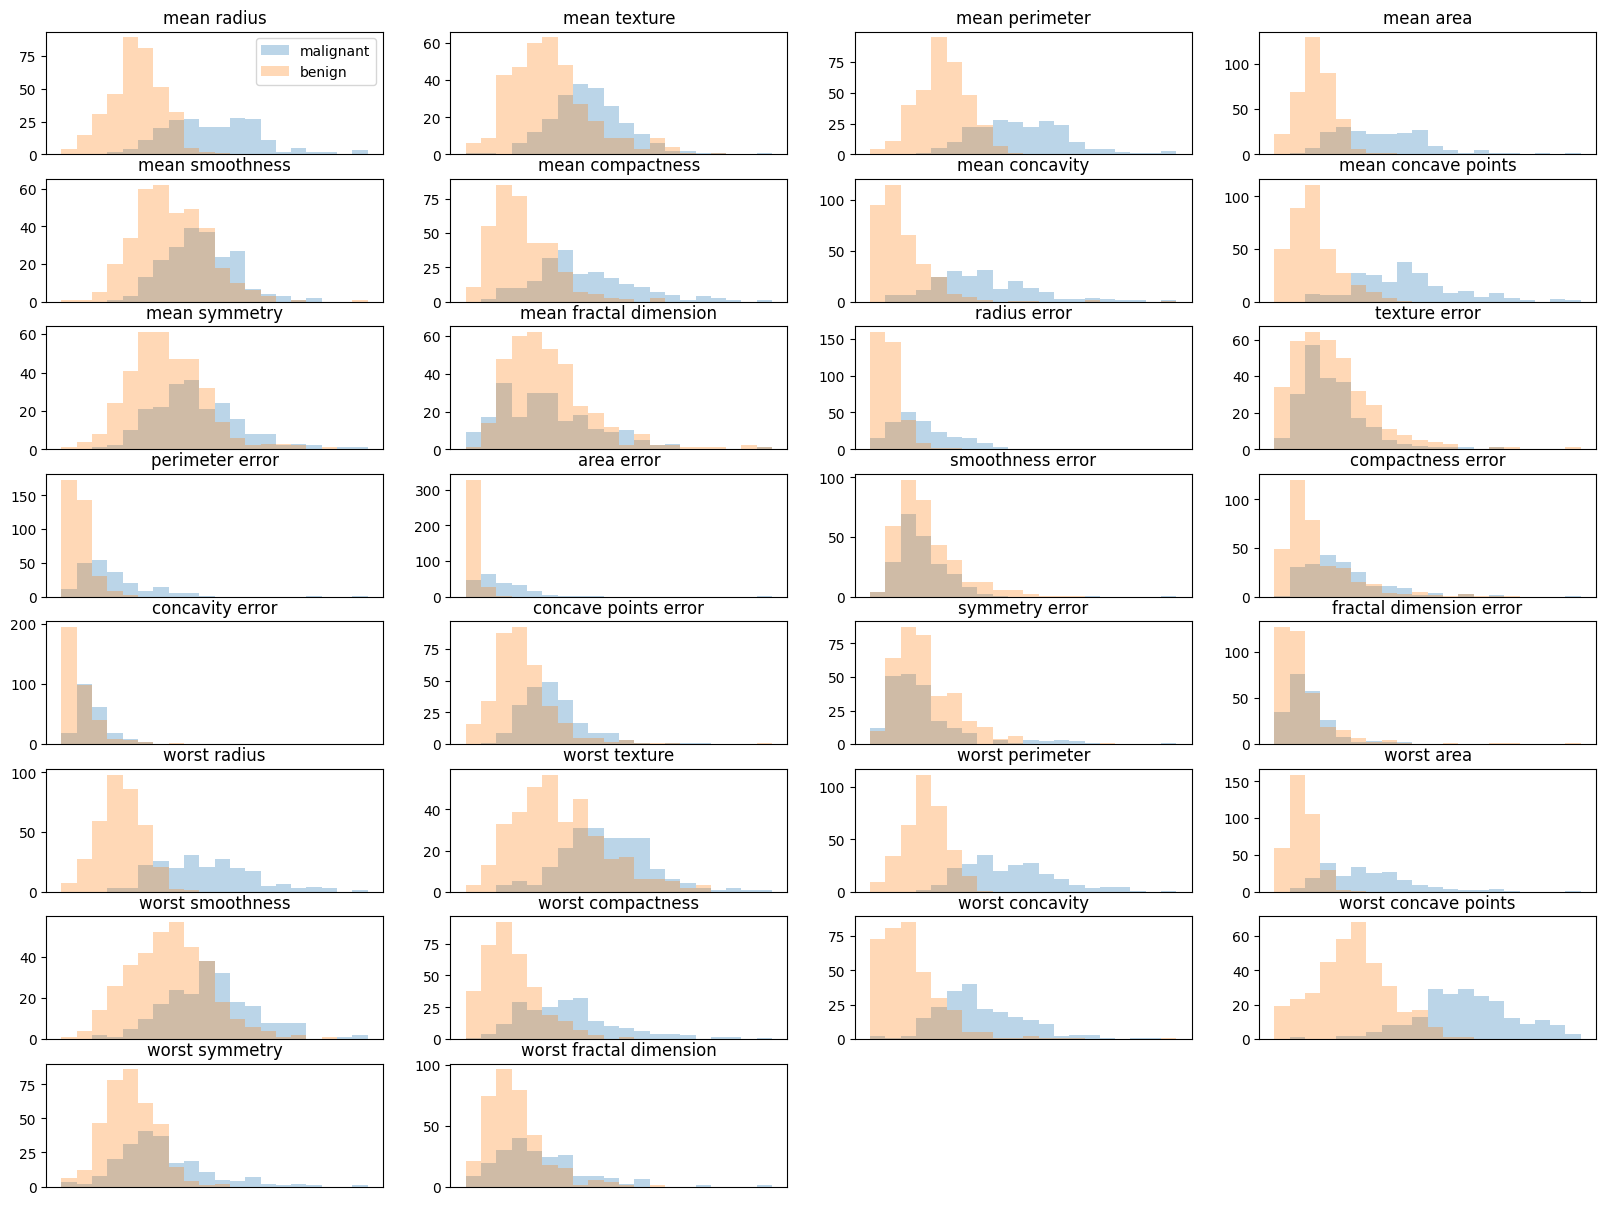

In [15]:
# 그림 그려보기
plt.figure(figsize = [20,15])

for col in range(len(cancer.feature_names)):
  plt.subplot(8, 4, col+1)
  _,bins = np.histogram(cancer.data[:,col],bins = 20)

  plt.hist(malignant[:,col], bins = bins, alpha = 0.3)
  plt.hist(benign[:,col], bins = bins, alpha = 0.3)
  plt.title(cancer.feature_names[col])
  if col == 0 : plt.legend(cancer.target_names)
  plt.xticks([])

In [17]:
from sklearn.linear_model import LogisticRegression

scores = []

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                      test_size = 0.2)
  model = LogisticRegression(max_iter = 5000)
  model.fit(X_train, y_train)

  score = model.score(X_test, y_test)
  scores.append(score)

print('scores = ', scores)

# for 문을 돌려서 K-Fold Cross validation 과 비슷한 결과를 냄
# split한 것을 10번씩 랜덤으로 돌리기때문에...
## 오~ 이해 못함~~ 와~~ 이해 안가는데~~~

scores =  [0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9824561403508771, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544]


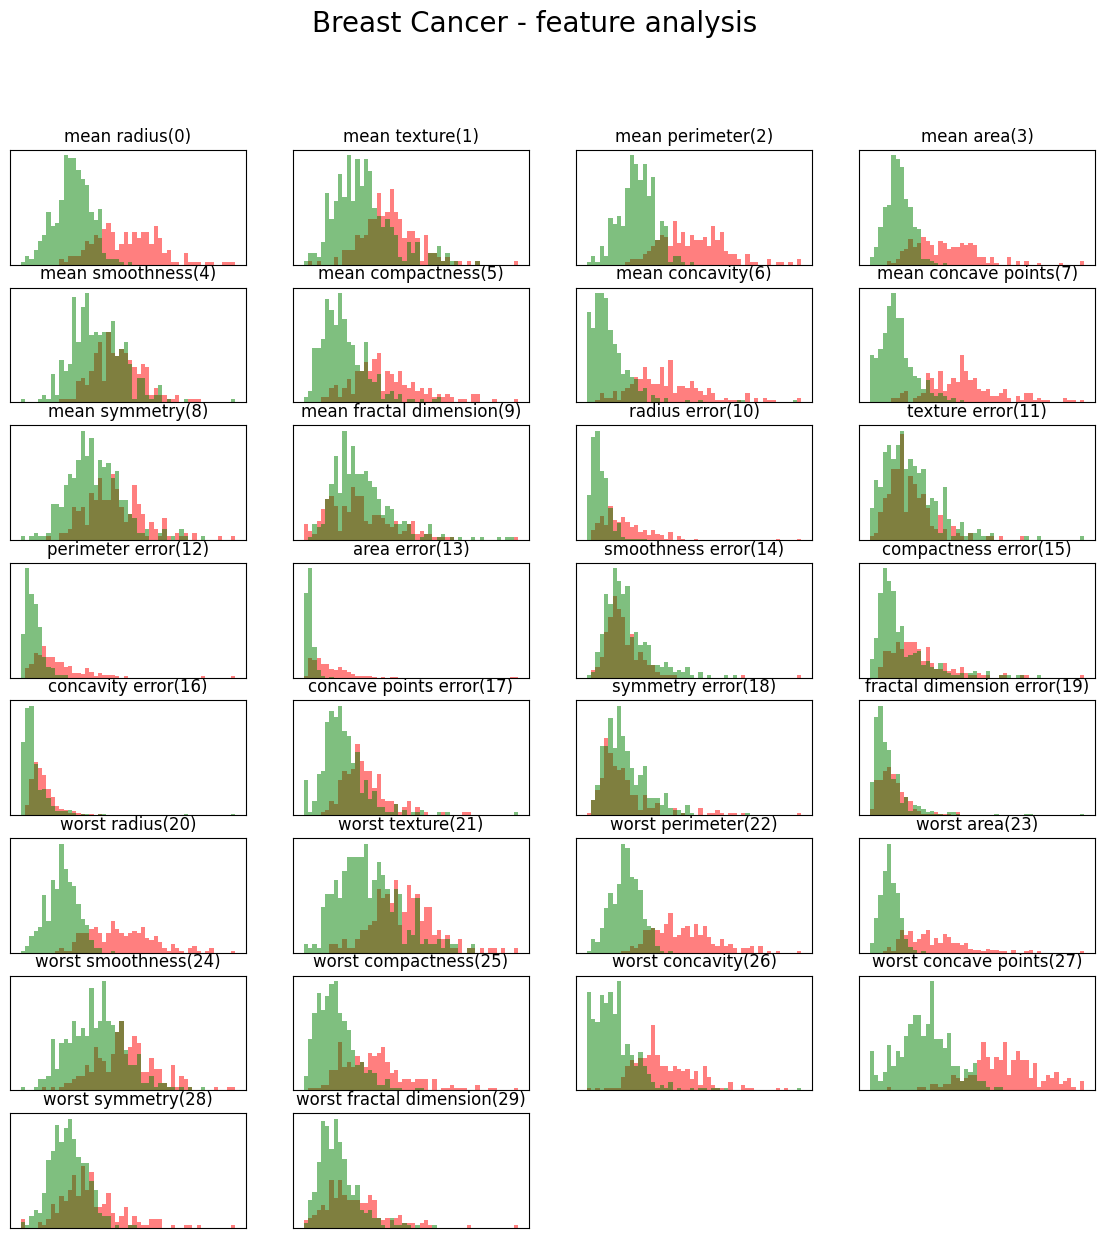

In [19]:
# 그림 그려보기2 - 진하게 그려보자

fig = plt.figure(figsize = [14, 14])
fig.suptitle('Breast Cancer - feature analysis', fontsize = 20)


for col in range(len(cancer.feature_names)):
  plt.subplot(8, 4, col+1)
  _,bins = np.histogram(cancer.data[:,col],bins = 50)

  plt.hist(malignant[:,col], bins = bins, alpha = 0.5, label = 'malignant', color = 'red')
  plt.hist(benign[:,col], bins = bins, alpha = 0.5, label = 'benign', color = 'green')
  plt.title(cancer.feature_names[col]+ ('(%d)' % col))
  plt.xticks([])
  plt.yticks([])
  if col == 0 : plt.legend

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 앞에서 했던 타이타닉에도 로지스틱이 더 좋은 결과가 나옴

### 로지스틱 회귀 실습 3
- 독버섯 분류하기(https://www.kaggle.com/uciml/mushroom-classification)
- 목적 : 독버섯(poisonous)인지 식용버섯(edible)인지 분류하는 것.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
mushroom = pd.read_csv('/content/mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [23]:
# 같은 값을 가진 열이 많음
# 원 핫 인코딩 하면 다 같은걸로 나와서 안됨
# 사이킷 런으로 라벨인코딩하기

# 라벨인코딩 : 이름으로 되어있는 것을 숫자로 혹은 그 반대로 변환하는 것.

from sklearn.preprocessing import LabelEncoder

Labelencoder = LabelEncoder()
for col in mushroom.columns :
  mushroom[col] = Labelencoder.fit_transform(mushroom[col])  # column 별로 LabelEncoder를 적용.
  # fit 내 데이터에서 추출해달라
  # transform 내 데이터에 적용해달라

mushroom


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


[Text(0.5, 1.0, 'Unique elements per column'),
 Text(0, 0.5, 'No of unique elements'),
 Text(0.5, 0, 'Features')]

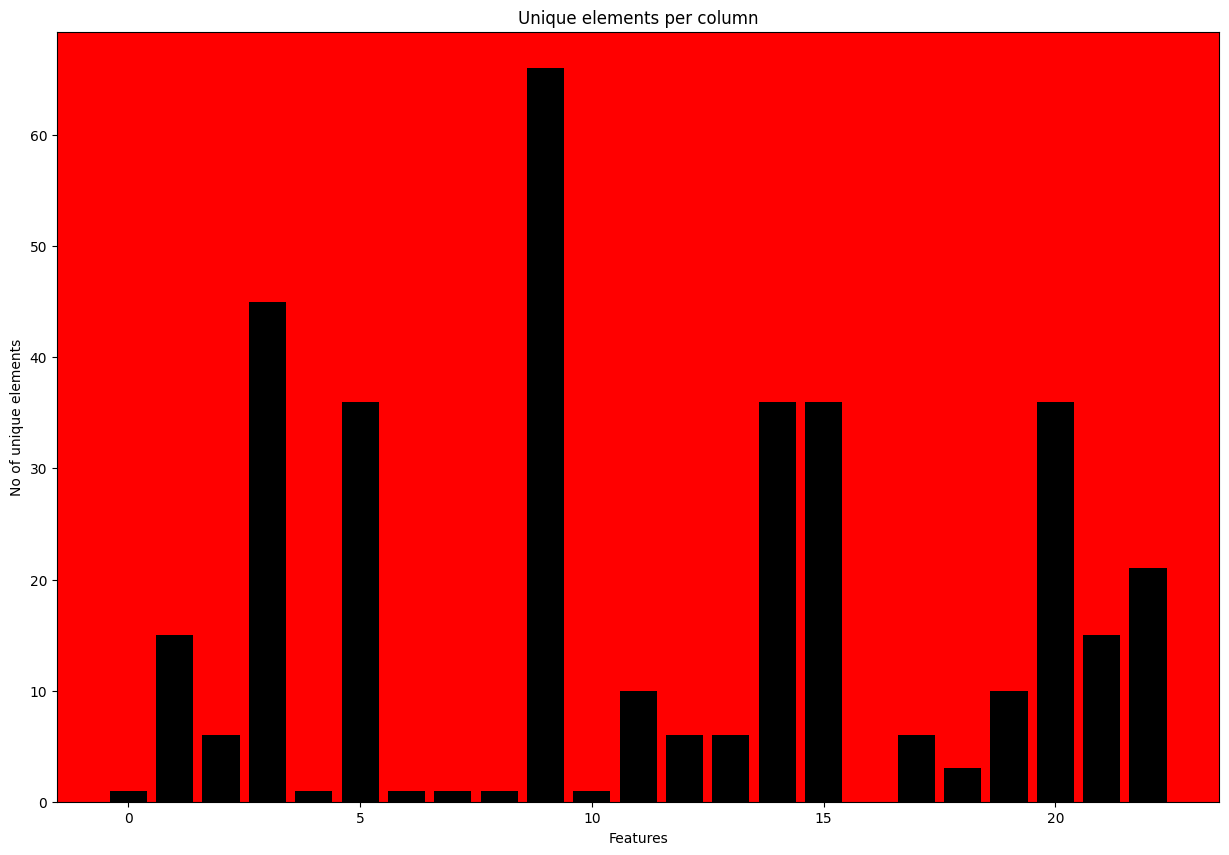

In [24]:
# 중복 제거하기

count_var = []

for col in mushroom.columns :
  count_var.append(mushroom[col].unique().sum())
  # Series 접근 -> column으로 접근하니까 Series와 똑같음
  # dataframe duplicated, duplicates -> 중복제거

size = np.arange(len(count_var))

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1, facecolor = 'r')
ax.bar(size, count_var, color = 'k')
ax.set(title = 'Unique elements per column',
       ylabel = 'No of unique elements',
       xlabel = 'Features')


<Axes: >

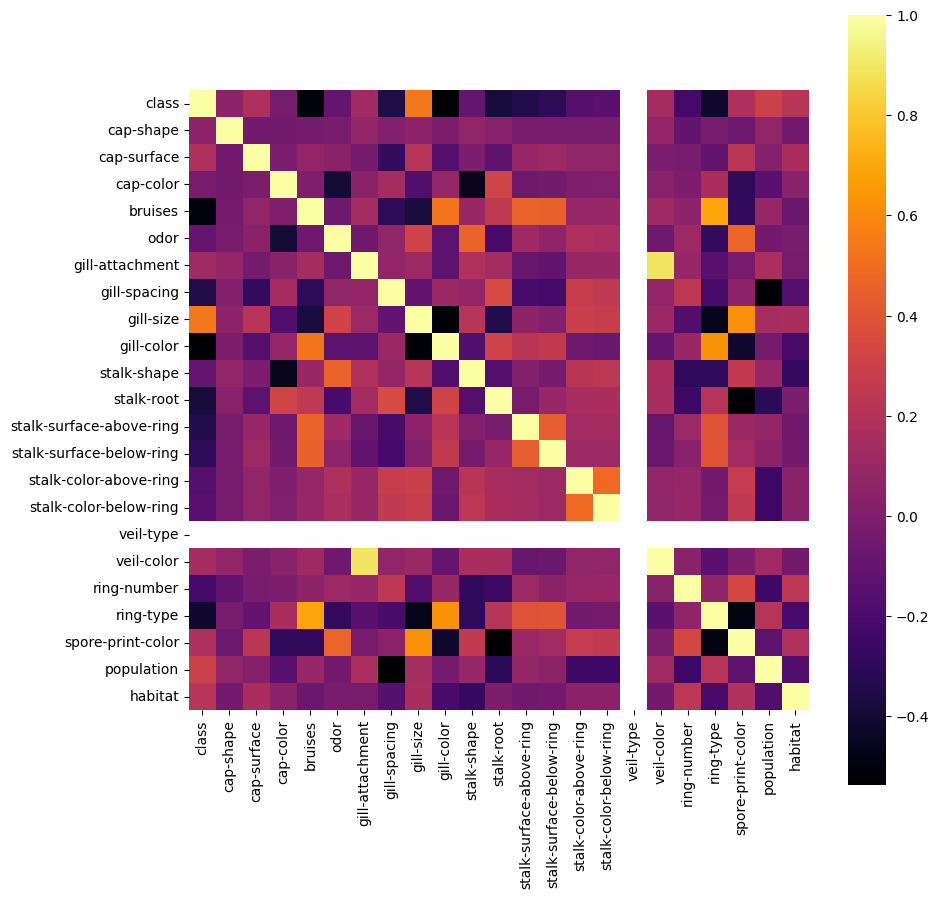

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(mushroom.corr(), cmap = 'inferno', square = True)

In [26]:
target = mushroom['class']
train = mushroom.drop('class', axis = 1)

Text(0.5, 1.0, 'Class distribution')

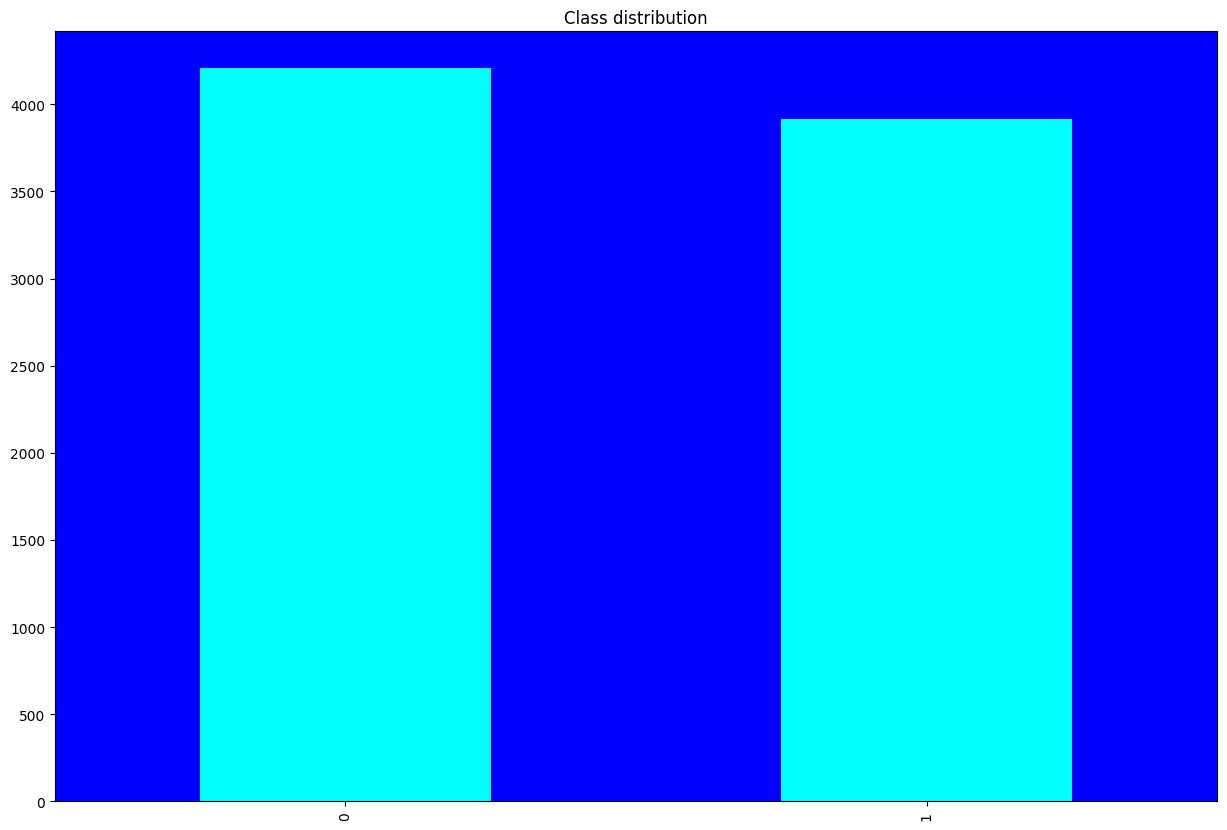

In [27]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1, facecolor = 'blue')
pd.value_counts(target).plot(kind = 'bar', cmap = 'cool')
plt.title('Class distribution')

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train, target)
clf.score(train, target)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9518709995076317